In [2]:
# import relevant libraries
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
temp_data = pd.read_csv("25June2022_Poll1.csv")

In [4]:
temp_data

,Timestamp,Username,Name,"In your area, right now, what is the temperature?",Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,28,C
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,29,C
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,19,C
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20,C
...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37,C
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22,C
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,22,C


In [5]:
# columns names
temp_data.columns

Index(['Timestamp', 'Username', 'Name',
       'In your area, right now, what is the temperature?',
       'Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?'],
      dtype='object')

In [6]:
# rename columns 
temp_data = temp_data.rename(columns={"Username":"Email", # Email is more accurate than Username (which Google Form defaults to)
                          "In your area, right now, what is the temperature?":"temperature", # this is more concise
                         "Did you provide that temperature in degrees Fahrenhait (F) or in degrees Celsius (C)?":"metric"}) # this is more concise 


In [7]:
#confirm the column has been renamed
temp_data

,Timestamp,Email,Name,temperature,metric
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,28,C
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,29,C
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,19,C
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28,C
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20,C
...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37,C
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19,C
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22,C
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,22,C


In [8]:
#look at the distinct values in the temperature column
temp_data["temperature"].unique()

array(['28', '29', '19', '28 ', '20', '30', '18', '27', '36',
       '28 Celsius', '17', '71', '22 ', '26', '38', '24', '45', '16',
       '21 Degrees ', '21', '25', '35', '70', '40', '37.5', '65', '37',
       '19 ', '22'], dtype=object)

In [9]:
#create a function that cleans the data by removing the unit some respondents added, strip removes the whitespaces
def clean_temp(temp_val):
    if "Degrees" in temp_val:
        return temp_val.replace("Degrees", "").strip()
    elif "Celsius" in temp_val:
        return temp_val.replace("Celsius", "").strip()
    elif "Fahrenheit" in temp_val:
        return temp_val.replace("Fahrenheit", "").strip()
    else:
        return temp_val

In [10]:
#applying the function created above
temp_data["temperature"] = temp_data["temperature"].apply(clean_temp)

In [11]:
#confirm the removal
temp_data["temperature"].unique()

array(['28', '29', '19', '28 ', '20', '30', '18', '27', '36', '17', '71',
       '22 ', '26', '38', '24', '45', '16', '21', '25', '35', '70', '40',
       '37.5', '65', '37', '19 ', '22'], dtype=object)

In [12]:
# number of rows
temp_data.shape[0]

66

In [13]:
#length which also shows rows number
len(temp_data)

66

In [14]:
# number of columns
temp_data.shape[1]

5

In [15]:
# breakdown of how many people answered in each metric
temp_data["metric"].value_counts()

C    61
F     5
Name: metric, dtype: int64

In [16]:
# data type of each column
temp_data.dtypes

Timestamp      object
Email          object
Name           object
temperature    object
metric         object
dtype: object

In [17]:
# data type of each temperature value
type(temp_data["temperature"].iloc[0])

str

In [18]:
# convert the strings to numbers in the temperature column
temp_data["temperature"] = pd.to_numeric(temp_data["temperature"])

In [19]:
# now the data type of each column
temp_data.dtypes

Timestamp       object
Email           object
Name            object
temperature    float64
metric          object
dtype: object

In [20]:
#to change the temp value to Farenheit
temp_in_f = np.array([]) # initializing an empty numpy array
for i in range(0, 66): #for each row in the df
    row = temp_data.iloc[i] # visit each row
    if row["metric"] == "C":  # if metric is C --> convert to F
        temp_in_f = np.append(temp_in_f, (row["temperature"] * (9 / 5)) + 32) #convert with (Celsius * 9/5) + 32 and append to the empty numpy array
    else:
        temp_in_f = np.append(temp_in_f, row["temperature"]) #else append the Farenheit value to the array
temp_in_f

array([ 82.4,  84.2,  66.2,  82.4,  68. ,  86. ,  64.4,  66.2,  66.2,
        68. ,  80.6,  68. ,  96.8,  82.4,  64.4,  62.6,  64.4,  64.4,
        82.4,  71. ,  71.6,  78.8,  82.4, 100.4,  64.4,  75.2,  86. ,
        82.4,  78.8,  75.2, 113. ,  82.4,  82.4,  60.8,  78.8,  80.6,
        69.8,  62.6,  69.8,  78.8,  25. ,  84.2,  20. ,  80.6,  86. ,
        95. ,  64.4,  80.6,  80.6,  84.2,  82.4,  70. ,  78.8, 104. ,
        68. ,  84.2,  99.5,  84.2,  65. ,  80.6,  80.6,  98.6,  66.2,
        71.6,  71.6,  80.6])

In [21]:
# check that the array length looks right
len(temp_in_f)

66

In [22]:
#to round up to 1 d.p
# call the built-in round function in python
# and use list comprehension
[round(val, 1) for val in temp_in_f]

[82.4,
 84.2,
 66.2,
 82.4,
 68.0,
 86.0,
 64.4,
 66.2,
 66.2,
 68.0,
 80.6,
 68.0,
 96.8,
 82.4,
 64.4,
 62.6,
 64.4,
 64.4,
 82.4,
 71.0,
 71.6,
 78.8,
 82.4,
 100.4,
 64.4,
 75.2,
 86.0,
 82.4,
 78.8,
 75.2,
 113.0,
 82.4,
 82.4,
 60.8,
 78.8,
 80.6,
 69.8,
 62.6,
 69.8,
 78.8,
 25.0,
 84.2,
 20.0,
 80.6,
 86.0,
 95.0,
 64.4,
 80.6,
 80.6,
 84.2,
 82.4,
 70.0,
 78.8,
 104.0,
 68.0,
 84.2,
 99.5,
 84.2,
 65.0,
 80.6,
 80.6,
 98.6,
 66.2,
 71.6,
 71.6,
 80.6]

In [23]:
# mean temperature in degrees Fahrenhait (F)
temp_in_f.mean()

76.2378787878788

In [24]:
#using a list instead of a numpy array for the conversion
temp_in_f_list = [] # initialize an empty list, 
for i in range(0, 66): # for each row in dataframe
    row = temp_data.iloc[i] # visit each row
    if row["metric"] == "C": # if metric is C, convert temperature to F and add converted value to list,
        temp_in_f_list.append((row["temperature"] * (9 / 5)) + 32)
    else:
        temp_in_f_list.append(row["temperature"]) # else add original temperature value to list

In [25]:
temp_in_f_list

[82.4,
 84.2,
 66.2,
 82.4,
 68.0,
 86.0,
 64.4,
 66.2,
 66.2,
 68.0,
 80.6,
 68.0,
 96.8,
 82.4,
 64.4,
 62.6,
 64.4,
 64.4,
 82.4,
 71.0,
 71.6,
 78.80000000000001,
 82.4,
 100.4,
 64.4,
 75.2,
 86.0,
 82.4,
 78.80000000000001,
 75.2,
 113.0,
 82.4,
 82.4,
 60.8,
 78.80000000000001,
 80.6,
 69.80000000000001,
 62.6,
 69.80000000000001,
 78.80000000000001,
 25.0,
 84.2,
 20.0,
 80.6,
 86.0,
 95.0,
 64.4,
 80.6,
 80.6,
 84.2,
 82.4,
 70.0,
 78.80000000000001,
 104.0,
 68.0,
 84.2,
 99.5,
 84.2,
 65.0,
 80.6,
 80.6,
 98.60000000000001,
 66.2,
 71.6,
 71.6,
 80.6]

In [26]:
# mean temperature in degrees Fahrenhait (F)
np.mean(temp_in_f_list)

76.2378787878788

In [27]:
# a way to round the list values
np.round(temp_in_f_list, 1)

array([ 82.4,  84.2,  66.2,  82.4,  68. ,  86. ,  64.4,  66.2,  66.2,
        68. ,  80.6,  68. ,  96.8,  82.4,  64.4,  62.6,  64.4,  64.4,
        82.4,  71. ,  71.6,  78.8,  82.4, 100.4,  64.4,  75.2,  86. ,
        82.4,  78.8,  75.2, 113. ,  82.4,  82.4,  60.8,  78.8,  80.6,
        69.8,  62.6,  69.8,  78.8,  25. ,  84.2,  20. ,  80.6,  86. ,
        95. ,  64.4,  80.6,  80.6,  84.2,  82.4,  70. ,  78.8, 104. ,
        68. ,  84.2,  99.5,  84.2,  65. ,  80.6,  80.6,  98.6,  66.2,
        71.6,  71.6,  80.6])

In [28]:
# add converted temperature values as a column into the dataframe
temp_data["temperature_F"] = temp_in_f

In [29]:
temp_data

,Timestamp,Email,Name,temperature,metric,temperature_F
0,2022/06/25 11:56:51 AM MDT,oluwaseyi.bola@gmail.com,Oluwaseyi Olukemi,28.0,C,82.4
1,2022/06/25 11:57:11 AM MDT,lizzyajai@gmail.com,Ajayi Elizabeth Damilola,29.0,C,84.2
2,2022/06/25 11:58:02 AM MDT,maryannmwangi36@gmail.com,Maryann Mwangi,19.0,C,66.2
3,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28.0,C,82.4
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20.0,C,68.0
...,...,...,...,...,...,...
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37.0,C,98.6
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19.0,C,66.2
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22.0,C,71.6
64,2022/06/25 1:11:47 PM MDT,rungibarbra@gmail.com,Barbra Birungi,22.0,C,71.6


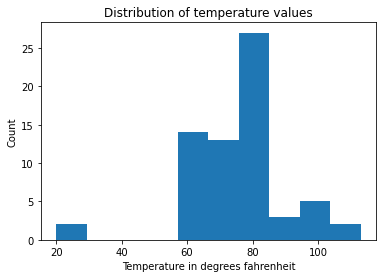

In [30]:
# create a histogram to visualize the distribution of temperature values in F
plt.hist(temp_data["temperature_F"])
plt.title("Distribution of temperature values")
plt.xlabel("Temperature in degrees fahrenheit")
plt.ylabel("Count")
plt.show()

In [31]:
# perform simple random sampling
# select a random sample of size 20 from the data
temp_data.sample(n=20)
# run this cell multiple times to see how the sample changes each time (due to the randomization)

,Timestamp,Email,Name,temperature,metric,temperature_F
13,2022/06/25 12:04:43 PM MDT,Fatimaisokrari@gmail.com,Fatima Isokrari,28.0,C,82.4
37,2022/06/25 12:23:16 PM MDT,chepkemoileila39@gmail.com,Leila Maritim,17.0,C,62.6
17,2022/06/25 12:05:44 PM MDT,phoebeymungai2@gmail.com,Phoebe Mungai,18.0,C,64.4
30,2022/06/25 12:14:16 PM MDT,edithngozi01@gmail.com,Edith Ngozi Anyogu,45.0,C,113.0
20,2022/06/25 12:07:17 PM MDT,jescamwende@gmail.com,Jesca Mwende,22.0,C,71.6
39,2022/06/25 12:28:04 PM MDT,ediongalex@gmail.com,Ediong Alexander,26.0,C,78.8
40,2022/06/25 12:34:39 PM MDT,Waakaeloveday@gmail.com,Inaania Waakae Loveday,25.0,F,25.0
61,2022/06/25 12:59:28 PM MDT,cynthiakuzira@gmail.com,Kuzira Cynthia,37.0,C,98.6
47,2022/06/25 12:37:44 PM MDT,enyeneoton@gmail.com,Enyeneobong Oton,27.0,C,80.6
62,2022/06/25 12:59:29 PM MDT,berylakinyi150@gmail.com,Ochieng Beril Akinyi,19.0,C,66.2


In [32]:
temp_data.sample(n=20, random_state=0)

,Timestamp,Email,Name,temperature,metric,temperature_F
45,2022/06/25 12:37:12 PM MDT,nwaodorifechukwude@gmail.com,Nwaodor ifechukwude destiny,35.0,C,95.0
28,2022/06/25 12:12:27 PM MDT,samanthaerskine1@gmail.com,Samantha Erskine,26.0,C,78.8
29,2022/06/25 12:12:56 PM MDT,roseheromini@gmail.com,Rozi Hieromini Mlay,24.0,C,75.2
55,2022/06/25 12:49:41 PM MDT,r.adeagbo@gmail.com,Roselyn Adeagbo,29.0,C,84.2
63,2022/06/25 12:59:58 PM MDT,kamisandra22@gmail.com,Sandra Kamikazi,22.0,C,71.6
31,2022/06/25 12:14:39 PM MDT,sobowalemoyinoluwa@gmail.com,Moyinoluwa Sobowale,28.0,C,82.4
51,2022/06/25 12:41:04 PM MDT,janice.gbedemah@gmail.com,Janice Afi Gbedemah,70.0,F,70.0
46,2022/06/25 12:37:30 PM MDT,yvonneakinyi1997@gmail.com,Yvonne Akinyi Okello,18.0,C,64.4
34,2022/06/25 12:19:03 PM MDT,ednadzottsi@gmail.com,EDNA SEYRAM DZOTTSI,26.0,C,78.8
4,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20.0,C,68.0


In [33]:
meal_data = pd.read_excel("25June2022_Poll2.xlsx")
meal_data

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,https://strawpoll.com/polls/X3nk6NdxVyE,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Answer Options,Votes,Percent,NaN
3,Breakfast,30,48.39%,NaN
4,Lunch,22,35.48%,NaN
...,...,...,...,...
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0
70,Tolulope Adeneye,0,0,1


In [34]:
# figure out at which row the votes from respondents start
meal_data.head(10)

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,https://strawpoll.com/polls/X3nk6NdxVyE,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Answer Options,Votes,Percent,NaN
3,Breakfast,30,48.39%,NaN
4,Lunch,22,35.48%,NaN
5,Dinner,10,16.13%,NaN
6,Total Votes,62,100%,NaN
7,NaN,NaN,NaN,NaN
8,Name,Breakfast,Lunch,Dinner
9,Oluwaseyi Olukemi,0,1,0


In [35]:
meal_data.iloc[8].values

array(['Name', 'Breakfast', 'Lunch', 'Dinner'], dtype=object)

In [36]:
# figure out at which row the votes from respondents end
meal_data.tail(10)

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
62,Esther Ugochukwu Amaka Okolie,0,1,0
63,Gertrude Abarinde,0,1,0
64,Roselyn Adeagbo,1,0,0
65,Victoria Bamikole,1,0,0
66,Fiona Masagbor,1,0,0
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0
70,Tolulope Adeneye,0,0,1
71,Total ✓ Votes,30,22,10


In [37]:
#select the rows with needed info
meal_data_cleaned = meal_data.iloc[9:71]
meal_data_cleaned

,What is your favorite meal of the day typically?,Unnamed: 1,Unnamed: 2,Unnamed: 3
9,Oluwaseyi Olukemi,0,1,0
10,Ajayi Elizabeth Damilola,0,1,0
11,Maryann Mwangi,1,0,0
12,Oreoluwa Jimi-Shotunde,1,0,0
13,Winfred Apolot,0,1,0
...,...,...,...,...
66,Fiona Masagbor,1,0,0
67,Jane Ndambuki,0,0,1
68,Modupeoluwa Adedeji,1,0,0
69,Yvanie KAMIKAZI,1,0,0


In [38]:
# rename the columns
meal_data_cleaned = meal_data_cleaned.rename(columns={"What is your favorite meal of the day typically?":"Name",
                                                     "Unnamed: 1":"Breakfast",
                                                     "Unnamed: 2":"Lunch",
                                                     "Unnamed: 3":"Dinner"})

In [39]:
# reset the row indices of the cleaned dataframe and drop the existing row indices
meal_data_cleaned = meal_data_cleaned.reset_index(drop=True)
meal_data_cleaned

,Name,Breakfast,Lunch,Dinner
0,Oluwaseyi Olukemi,0,1,0
1,Ajayi Elizabeth Damilola,0,1,0
2,Maryann Mwangi,1,0,0
3,Oreoluwa Jimi-Shotunde,1,0,0
4,Winfred Apolot,0,1,0
...,...,...,...,...
57,Fiona Masagbor,1,0,0
58,Jane Ndambuki,0,0,1
59,Modupeoluwa Adedeji,1,0,0
60,Yvanie KAMIKAZI,1,0,0


In [40]:
meal=[]

In [41]:
# for each row in the cleaned dataframe,
# if the value in the Breakfast column is 1, add "Breakfast" to the meal list,
# elif the value in the Lunch column is 1, add "Lunch" to the meal list,
# else add "Dinner" to the meal list
for i in range(0, 62):
    row = meal_data_cleaned.iloc[i]
    if row["Breakfast"] == 1:
        meal.append("Breakfast")
    elif row["Lunch"] == 1:
        meal.append("Lunch")
    else:
        meal.append("Dinner")

In [42]:
meal

['Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Dinner',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Dinner',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Dinner',
 'Lunch',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Dinner',
 'Breakfast',
 'Lunch',
 'Lunch',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Dinner',
 'Breakfast',
 'Breakfast',
 'Dinner']

In [43]:
# add the meal list as a new column into the dataframe
meal_data_cleaned["meal"] = meal
meal_data_cleaned

,Name,Breakfast,Lunch,Dinner,meal
0,Oluwaseyi Olukemi,0,1,0,Lunch
1,Ajayi Elizabeth Damilola,0,1,0,Lunch
2,Maryann Mwangi,1,0,0,Breakfast
3,Oreoluwa Jimi-Shotunde,1,0,0,Breakfast
4,Winfred Apolot,0,1,0,Lunch
...,...,...,...,...,...
57,Fiona Masagbor,1,0,0,Breakfast
58,Jane Ndambuki,0,0,1,Dinner
59,Modupeoluwa Adedeji,1,0,0,Breakfast
60,Yvanie KAMIKAZI,1,0,0,Breakfast


In [44]:
# breakdown of number of votes per meal
meal_data_cleaned["meal"].value_counts()

Breakfast    30
Lunch        22
Dinner       10
Name: meal, dtype: int64

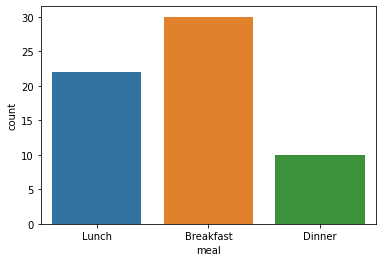

In [45]:
# create a countplot to visualize the breakdown of number of votes per meal
sn.countplot(x = "meal", data = meal_data_cleaned)
plt.show()

In [46]:
# merge the two specified dataframes, and store the resulting dataframe in a new variable
temp_meal_data = pd.merge(temp_data, meal_data_cleaned, how="inner", on="Name")
temp_meal_data

,Timestamp,Email,Name,temperature,metric,temperature_F,Breakfast,Lunch,Dinner,meal
0,2022/06/25 11:58:47 AM MDT,tjshotunde@yahoo.com,Oreoluwa Jimi-Shotunde,28.0,C,82.4,1,0,0,Breakfast
1,2022/06/25 12:00:01 PM MDT,winfredplt583@gmail.com,Winfred Apolot,20.0,C,68.0,0,1,0,Lunch
2,2022/06/25 12:02:14 PM MDT,missonyango.so@gmail.com,Shereen Onyango,18.0,C,64.4,0,0,1,Dinner
3,2022/06/25 12:02:25 PM MDT,njerimacharia07@gmail.com,Njeri Macharia,19.0,C,66.2,1,0,0,Breakfast
4,2022/06/25 12:02:47 PM MDT,rachealsibindi@gmail.com,Racheal Sibindi,19.0,C,66.2,0,1,0,Lunch
5,2022/06/25 12:02:53 PM MDT,halimatshaddiya@gmail.com,Halimat Raji,20.0,C,68.0,1,0,0,Breakfast
6,2022/06/25 12:03:23 PM MDT,oluwatobiibironkeoluwa@gmail.com,Oluwatobi Oluwa,27.0,C,80.6,0,0,1,Dinner
7,2022/06/25 12:03:40 PM MDT,annakarungi15@gmail.com,Karungi Anna,20.0,C,68.0,1,0,0,Breakfast
8,2022/06/25 12:04:43 PM MDT,Fatimaisokrari@gmail.com,Fatima Isokrari,28.0,C,82.4,0,0,1,Dinner
9,2022/06/25 12:04:44 PM MDT,wacheramaina@gmail.com,Mary Wacera Maina,18.0,C,64.4,1,0,0,Breakfast


In [47]:
temp_meal_data.shape[0]

31

In [48]:
temp_meal_data.shape[1]

10

In [49]:
# group by meal and get the average temperature in F
temp_meal_data.groupby(by = "meal")["temperature_F"].mean()

meal
Breakfast    71.580000
Dinner       79.485714
Lunch        77.800000
Name: temperature_F, dtype: float64

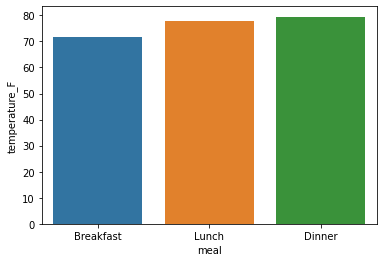

In [50]:
# create a barplot to visualize the average local temperature in F of respondents grouped by preferred meal
sn.barplot(x = "meal", y = "temperature_F", data = temp_meal_data, ci = False)
plt.show()